In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Boston.csv")
print(df.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  CAT. MEDV  Unnamed: 15  Unnamed: 16  
0  396.90   4.98  24.0          0          NaN

In [3]:
df.drop(columns=['Unnamed: 15',"Unnamed: 16",'CAT. MEDV'], inplace=True)


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
from scipy.stats import zscore
import numpy as np

In [8]:
original_df = df.copy()

In [9]:
zscores = np.abs(zscore(df))
df = df[(zscores < 3).all(axis=1)]

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


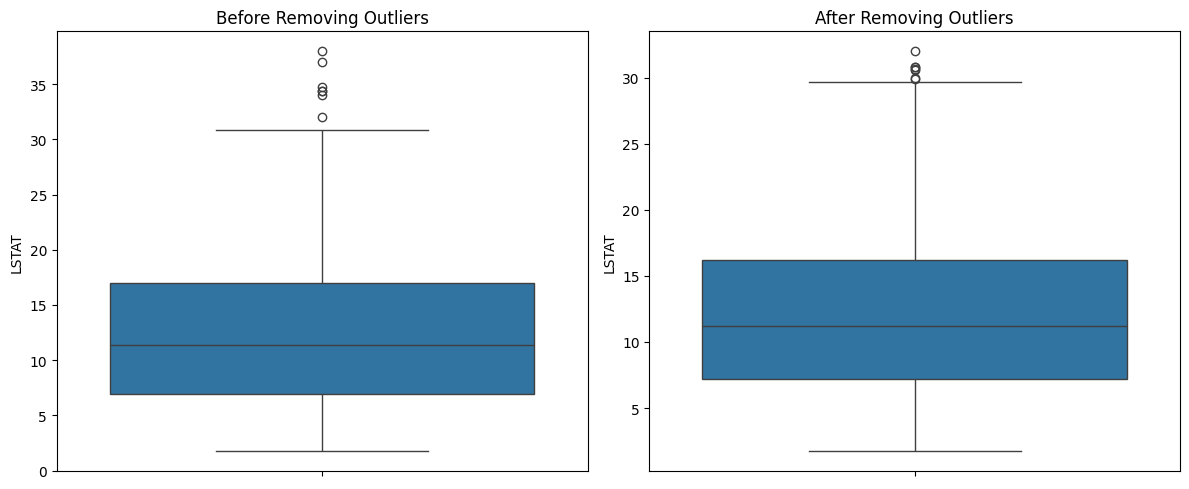

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot before and after for one feature, e.g., LSTAT
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='LSTAT', data=original_df, ax=axes[0])
axes[0].set_title('Before Removing Outliers')
sns.boxplot(y='LSTAT', data=df, ax=axes[1])
axes[1].set_title('After Removing Outliers')
plt.tight_layout()
plt.show()


In [11]:
cor = df.corr()
cor.loc['MEDV']

CRIM      -0.418531
ZN         0.306172
INDUS     -0.486369
CHAS            NaN
NOX       -0.417222
RM         0.734041
AGE       -0.384446
DIS        0.234420
RAD       -0.347297
TAX       -0.453723
PTRATIO   -0.476781
B          0.234161
LSTAT     -0.738700
MEDV       1.000000
Name: MEDV, dtype: float64

<Axes: >

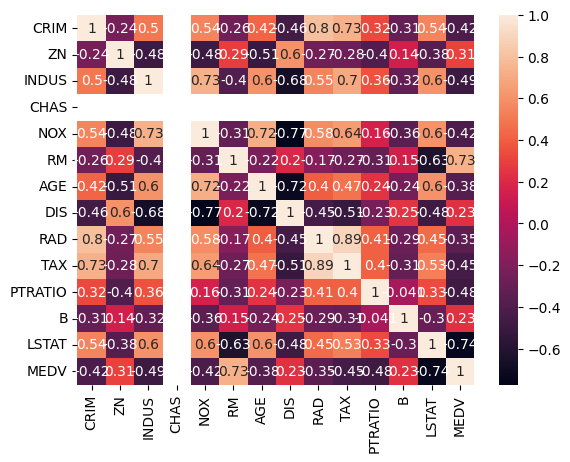

In [12]:
import seaborn as sns
sns.heatmap(cor, annot=True)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,'MEDV']
X.shape, Y.shape

((415, 3), (415,))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [17]:
scaler.fit(x_train)

StandardScaler()

In [18]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()

In [21]:
model.add(Dense(128,input_shape =(3,),activation='linear',name='input'))
model.add(Dense(64,activation='linear',name='layer1'))
model.add(Dense(128,activation='linear',name='layer2'))
model.add(Dense(128,activation='linear',name='layer3'))
model.add(Dense(64,activation='linear',name='layer4'))
model.add(Dense(64,activation='linear',name='layer5'))
model.add(Dense(32,activation='linear',name='layer6'))
model.add(Dense(32,activation='linear',name='layer7'))
model.add(Dense(16,activation='linear',name='layer8'))
model.add(Dense(16,activation='linear',name='layer9'))
model.add(Dense(8,activation='linear',name='layer10'))
model.add(Dense(8,activation='linear',name='layer11'))
model.add(Dense(4,activation='linear',name='layer12'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.fit(x_train,y_train,epochs=40,validation_split=0.05)

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 544.7475 - mae: 22.2536 - val_loss: 404.2515 - val_mae: 19.6719
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 388.5860 - mae: 19.0714 - val_loss: 185.6966 - val_mae: 12.6373
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 119.2505 - mae: 8.8235 - val_loss: 67.0400 - val_mae: 6.5436
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.6802 - mae: 5.5368 - val_loss: 27.9477 - val_mae: 4.5048
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.6298 - mae: 4.1245 - val_loss: 19.9724 - val_mae: 3.5915
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.8609 - mae: 3.6126 - val_loss: 14.9211 - val_mae: 3.0049
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.3121 - mae: 3.4614 - val_loss: 10.7460 - val_mae: 2.3458
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.1626 - mae: 3.2695 - val_loss: 12.4461 - val_mae: 2.6796
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

In [23]:
output = model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.4629 - mae: 4.2536


In [24]:
y_pred = model.predict(x=x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test and y_pred are already defined
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 23.06
Mean Absolute Error (MAE): 4.09
R² Score: 0.61


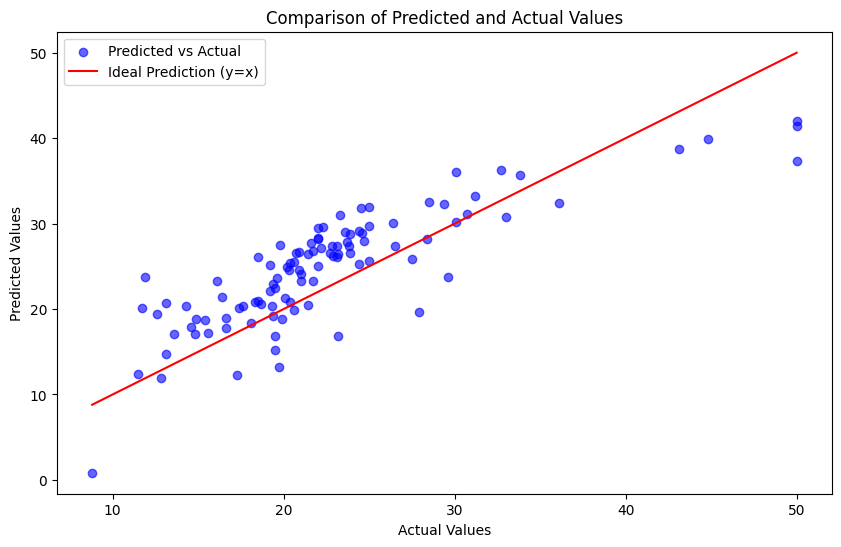

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, color='blue', label = 'Predicted vs Actual', alpha=0.6)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', label='Ideal Prediction (y=x)')

# Adding labels and title
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()